Soluzione calcolata: 0.3149
Errore Relativo della soluzione calcolata: 0.00001.


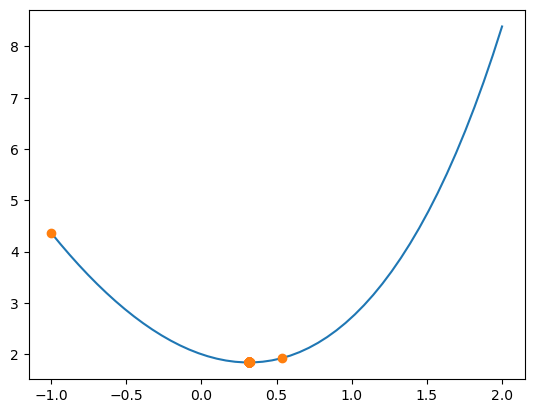

In [26]:
import numpy as np
import matplotlib.pyplot as plt


def f(x):
    return (x-1) ** 2 + np.exp(x)


def df(x):
    return 2*(x-1) + np.exp(x)


def GD(f, df, x0, alpha, maxit=100):
    r"""
    Implementa il metodo di discesa del gradiente con passo fisso applicato ad una funzione f(x) della quale si conosce la derivata df(x). 

    Parameters:
    f (function): la funzione obiettivo che si vuole minimizzare
    df (function): la derivata (o gradiente) della funzione obiettivo
    x0 (ndarray): valore iniziale dell'algoritmo
    alpha (float): il passo fisso che descrive gli step dell'algoritmo
    maxit (int): numero di iterazioni
    """
    # Inizializzazione
    k = 0

    X = [x0]

    # Ciclo iterativo (uso un ciclo while)
    while k < maxit:
        # Aggiornamento x_{k+1} = x_k - alpha_k df(x_k)
        x = x0 - alpha(X[k]) * df(x0)
        X.append(x)

        # Preparazione per step successivo
        k = k + 1
        x0 = x

    return X


# Fissiamo i parametri dell'algoritmo (iperparametri)
x0 = -1
# alpha = 1e-1
def alpha(x):
    return 1/(2+np.exp(x))
maxit = 100

# Calcoliamo la soluzione
X = GD(f, df, x0, alpha, maxit)
x_sol = X[len(X)-1]
print(f"Soluzione calcolata: {x_sol:0.4f}")

# A scopo di analisi di prestazioni, misuriamo l'errore rispetto al minimo (noto)
x_true = 0.31492
rel_err = np.linalg.norm(x_sol - x_true) / np.linalg.norm(x_true)
print(f"Errore Relativo della soluzione calcolata: {rel_err:0.5f}.")

xx = np.linspace(-1, 2, 50)
plt.plot(xx, list(map(f, xx)))
plt.plot(X, list(map(f, X)), 'o')

plt.show()


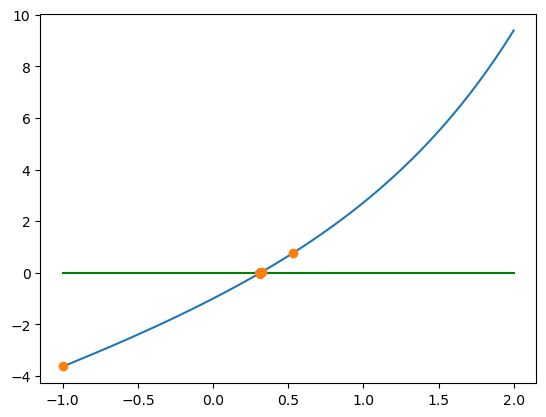

In [27]:
plt.plot(xx, list(map(df, xx)))
plt.plot([-1, 2], [0,0], 'g')
plt.plot(X, list(map(df, X)), 'o')

plt.show()

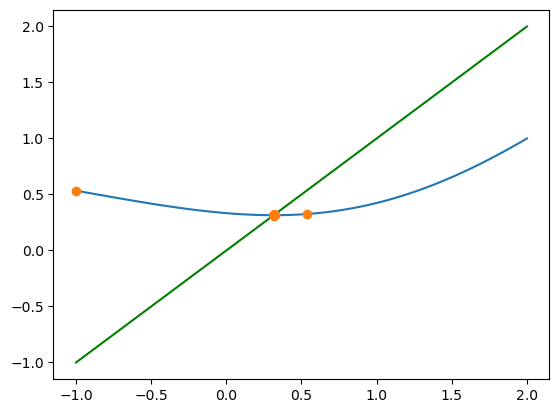

In [28]:
def g(x):
    return x - alpha(x)*df(x)

plt.plot(xx, list(map(g, xx)))
plt.plot([-1, 2], [-1, 2], 'g')
plt.plot(X, list(map(g, X)), 'o')

plt.show()

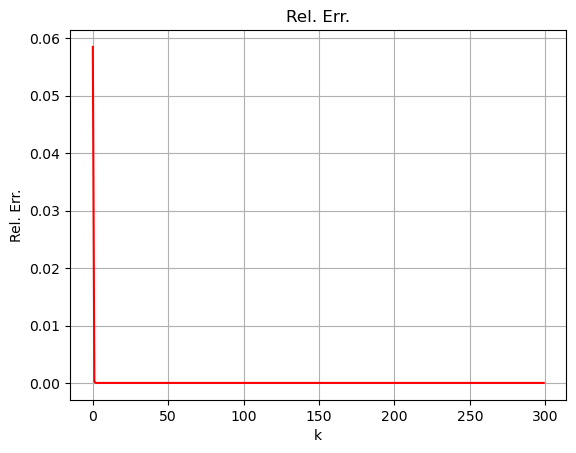

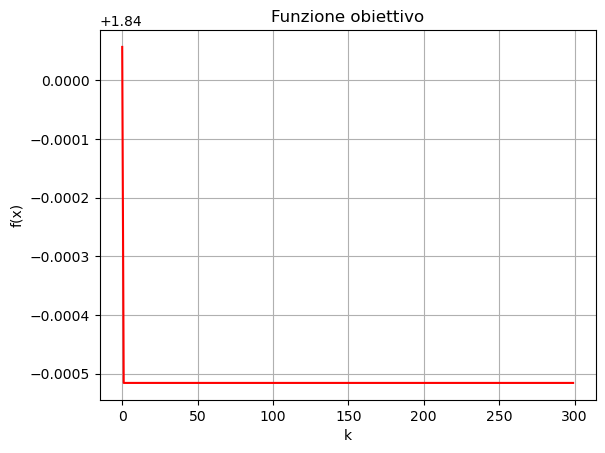

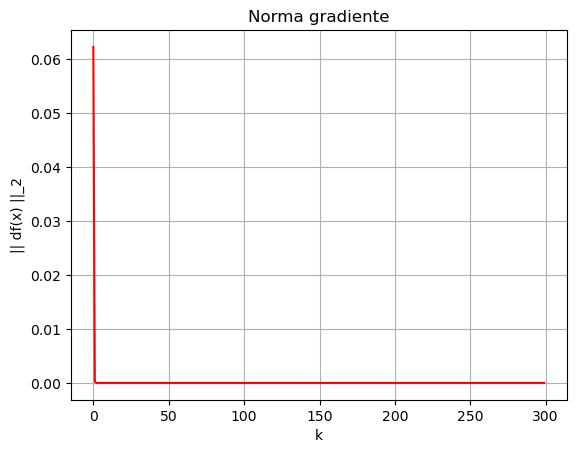

In [29]:
def GD(f, df, x0, x_true, alpha, maxit=100):
    r"""
    Implementa il metodo di discesa del gradiente con passo fisso applicato ad una funzione f(x) della quale si conosce la derivata df(x). 

    Parameters:
    f (function): la funzione obiettivo che si vuole minimizzare
    df (function): la derivata (o gradiente) della funzione obiettivo
    x0 (ndarray): valore iniziale dell'algoritmo
    x_true (ndarray): la soluzione esatta dell'algoritmo (nota SOLO in fase di test)
    alpha (function): il passo fisso che descrive gli step dell'algoritmo
    maxit (int): numero di iterazioni
    """
    # Inizializzazione
    k = 0
    rel_err = np.zeros((maxit, ))
    obj_val = np.zeros((maxit, ))
    grad_norm = np.zeros((maxit, ))

    # Ciclo iterativo (uso un ciclo while)
    while k < maxit:
        # Aggiornamento x_{k+1} = x_k - alpha_k df(x_k)
        x = x0 - alpha(x0) * df(x0)

        # Calcolo dell'errore e salvataggio
        rel_err[k] = np.linalg.norm(x - x_true) / np.linalg.norm(x_true)
        obj_val[k] = f(x)
        grad_norm[k] = np.linalg.norm(df(x))

        # Preparazione per step successivo
        k = k + 1
        x0 = x

    return x, rel_err, obj_val, grad_norm

# Fissiamo i parametri dell'algoritmo (iperparametri)
x0 = 0
x_true = 0.31492
maxit = 300

# Calcoliamo la soluzione
x_sol, rel_err, obj_val, grad_norm = GD(f, df, x0, x_true, alpha, maxit)

# Visualizziamo le metriche
plt.plot(np.arange(maxit), rel_err, "r-")
plt.xlabel("k")
plt.ylabel("Rel. Err.")
plt.title("Rel. Err.")
plt.grid()
plt.show()

plt.plot(np.arange(maxit), obj_val, "r-")
plt.xlabel("k")
plt.ylabel("f(x)")
plt.title("Funzione obiettivo")
plt.grid()
plt.show()

plt.plot(np.arange(maxit), grad_norm, "r-")
plt.xlabel("k")
plt.ylabel("|| df(x) ||_2")
plt.title("Norma gradiente")
plt.grid()
plt.show()